<a href="https://colab.research.google.com/github/Risuo/Springboard/blob/master/Revised_TPU_Quick_Draw_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://cloud.google.com/tpu/docs/storage-buckets

import tensorflow as tf
import numpy as np
import pprint
import glob
import os
import matplotlib.pyplot as plt
import urllib.request
from random import randint
%matplotlib inline
from google.colab import files

import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
  raise Exception ('No go bro, use Tensorflow 1.14 or newer')

In [0]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2020-01-07 17:20:21--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2020-01-07 17:20:26 (85.9 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [0]:
f = open('more_classes.txt', 'r')

classes = f.readlines()
f.close()

In [0]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [0]:
!mkdir data

In [0]:
print(os.path.exists('/content/data/The_Eiffel_Tower.npy'))
print(classes[0])

False
drums


In [0]:
def download():

  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base + cls_url + '.npy'
    check_path_base = '/content/data/'
    #print(check_path_base + cls_url + '.npy')
    if os.path.exists(check_path_base + c + '.npy'):
      print('exists ' + path)
    else:
      print(path)
      urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [0]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/animal%20migration.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/arm.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/asparagus.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickd

In [0]:
test_all = glob.glob(os.path.join('data', '*.npy'))
print(len(test_all))
print((test_all[0]))

160
data/rabbit.npy


In [0]:
a = np.load('data/fan.npy')

In [0]:
def load_data(root, vfold_ratio = 0.2, max_items_per_class = 5000):
  all_files = glob.glob(os.path.join(root, '*.npy'))

  x = np.empty([0, 784])
  y = np.empty([0])
  class_names = []

  for idx, file in enumerate(all_files):
    data = np.load(file)
    data = data[0: max_items_per_class, :]
    labels = np.full(data.shape[0], idx)

    x = np.concatenate((x, data), axis = 0)
    y = np.append(y, labels)

    class_name, ext = os.path.splitext(os.path.basename(file))
    class_names.append(class_name)
    print(idx, ': finished: ' + class_name)

  data = None
  labels = None
  permutation = np.random.permutation(y.shape[0])
  x = x[permutation, :]
  y = y[permutation]

  vfold_size = int(x.shape[0]/100*(vfold_ratio * 100))

  x_test = x[0:vfold_size, :]
  y_test = y[0:vfold_size]

  x_train = x[vfold_size:x.shape[0], :]
  y_train = y[vfold_size:y.shape[0]]

  return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train_basic, y_train_basic, x_test_basic, y_test_basic, class_names_basic = load_data('data')

0 : finished: rabbit
1 : finished: key
2 : finished: pineapple
3 : finished: passport
4 : finished: flying_saucer
5 : finished: lantern
6 : finished: piano
7 : finished: pool
8 : finished: picture_frame
9 : finished: leg
10 : finished: frog
11 : finished: sweater
12 : finished: bench
13 : finished: pear
14 : finished: eyeglasses
15 : finished: palm_tree
16 : finished: microphone
17 : finished: floor_lamp
18 : finished: fish
19 : finished: monkey
20 : finished: house_plant
21 : finished: flashlight
22 : finished: kangaroo
23 : finished: postcard
24 : finished: lighthouse
25 : finished: coffee_cup
26 : finished: nail
27 : finished: onion
28 : finished: rain
29 : finished: mountain
30 : finished: toe
31 : finished: lion
32 : finished: police_car
33 : finished: moustache
34 : finished: paper_clip
35 : finished: fire_hydrant
36 : finished: fireplace
37 : finished: dresser
38 : finished: bicycle
39 : finished: owl
40 : finished: firetruck
41 : finished: nose
42 : finished: backpack
43 : fini

In [0]:
num_classes = len(class_names_basic)
image_size = 28

In [0]:
print(len(x_train_basic))
print((x_train_basic.shape))

print(len(x_test_basic))
print(x_test_basic.shape)

print(len(y_train_basic))
print((y_train_basic.shape))

print(len(y_test_basic))
print(y_test_basic.shape)


640000
(640000, 784)
160000
(160000, 784)
640000
(640000,)
160000
(160000,)


pool


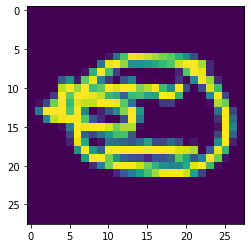

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_train_basic))
plt.imshow(x_train_basic[idx].reshape(28,28)) 
print(class_names_basic[int(y_train_basic[idx].item())])

In [0]:
x_train_basic_reshape = x_train_basic.reshape(x_train_basic.shape[0], image_size, image_size, 1).astype('float32')
x_test_basic_reshape = x_test_basic.reshape(x_test_basic.shape[0], image_size, image_size, 1).astype('float32')

x_train_basic_reshape /= 255.0
x_test_basic_reshape /= 255.0

y_train_basic_reshape = tf.keras.utils.to_categorical(y_train_basic, num_classes)
y_test_basic_reshape = tf.keras.utils.to_categorical(y_test_basic, num_classes)


In [0]:
print(x_train_basic_reshape.shape)
print(x_test_basic_reshape.shape)

print(y_train_basic_reshape.shape)
print(y_test_basic_reshape.shape)



(640000, 28, 28, 1)
(160000, 28, 28, 1)
(640000, 160)
(160000, 160)


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Convolution2D(16, (3,3), padding = 'same', input_shape = x_train_basic_reshape.shape[1:], activation = 'relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Convolution2D(64, (3,3), padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Convolution2D(128, (3,3), padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation = 'relu'))
  model.add(tf.keras.layers.Dense(160, activation = 'softmax'))
  return model

In [0]:
resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3, ),
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', 'top_k_categorical_accuracy'])

model.fit(x_train_basic_reshape.astype(np.float32), y_train_basic_reshape.astype(np.float32),
    epochs=20,
    steps_per_epoch=640,
    validation_data=(x_test_basic_reshape.astype(np.float32), y_test_basic_reshape.astype(np.float32)),
    validation_freq=20)


INFO:tensorflow:Initializing the TPU system: 10.107.155.34:8470
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.107.155.34:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11530802761085670181)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 5608773605910807308)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 4198686510344354586)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 6891766409755266261)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/dev

In [0]:

model.save_weights('./doodles_160.h5', overwrite = True)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0

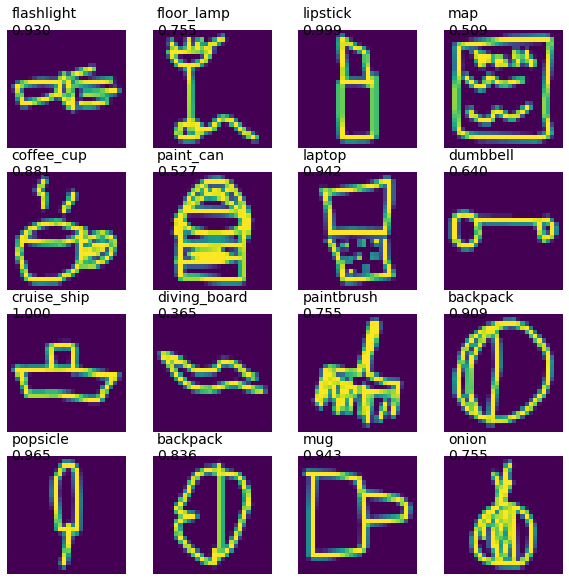

In [0]:
cpu_model = create_model()
cpu_model.load_weights('/content/doodles_160.h5')

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n/4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    label = class_names_basic[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(.5, .5, label + '\n%.3f' % confidence, fontsize = 14)

  pyplot.gcf().set_size_inches(10,10)

plot_predictions(np.squeeze(x_test_basic_reshape[16:32]),
                 cpu_model.predict(x_test_basic_reshape[16:32]))

In [0]:
with open('class_names.txt', 'w') as file_handler:
  for item in class_names_basic:
    file_handler.write("{}\n".format(item))

In [0]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 17.3MB 260kB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 256kB 56.3MB/s 
     |████████████████████████████████| 901kB 49.7MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=cfe8fd687e2dd074ea4f203728822f2b591a00f0dbcf57c702f19f6933b3a272
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully 

In [0]:
model.save('keras.h5')

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists


In [0]:
!cp class_names.txt model/class_names.txt

In [0]:
!zip -r model.zip model

updating: model/ (stored 0%)
updating: model/model.json (deflated 82%)
updating: model/class_names.txt (deflated 44%)
updating: model/group1-shard1of1.bin (deflated 7%)
  adding: model/keras.h5 (deflated 7%)
  adding: model/doodles_160.h5 (deflated 8%)


In [0]:
from google.colab import files
files.download('model.zip')